<a href="https://colab.research.google.com/github/chris20834/AI-Summer-Camp/blob/main/CNN_%E5%9E%83%E5%9C%BE%E5%88%86%E9%A1%9E%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# 檔案下載 "https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification"

In [4]:
import zipfile
import os

# 確認上傳檔案名稱（如果不確定可列出目錄）
print(os.listdir())

# 解壓縮檔案
with zipfile.ZipFile('Garbage classification.zip', 'r') as zip_ref:
    zip_ref.extractall('Garbage classification')  # 解壓縮到資料夾中

['.config', 'Garbage classification.zip', 'sample_data']


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'Garbage classification/Garbage classification',  # 資料集路徑
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'Garbage classification/Garbage classification',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,550 (6.61 MB)

 Trainable params: 1,732,550 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)


Epoch 1/3
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.2535 - loss: 1.6951 - val_accuracy: 0.4056 - val_loss: 1.5048
Epoch 2/3
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4412 - loss: 1.3864 - val_accuracy: 0.4274 - val_loss: 1.4948
Epoch 3/3
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4915 - loss: 1.2483 - val_accuracy: 0.4354 - val_loss: 1.4642


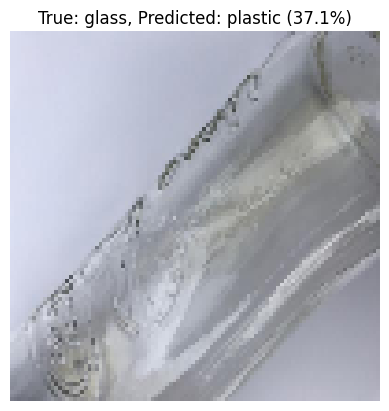

📊 Predicted Probabilities:
cardboard      : 5.39%
glass          : 29.71%
metal          : 5.34%
paper          : 21.21%
plastic        : 37.10%
trash          : 1.26%


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 隨機抓一張驗證圖片
batch = next(val_generator)
image = batch[0][0]
true_label = np.argmax(batch[1][0])

# 模型預測
pred = model.predict(image.reshape(1, 100, 100, 3), verbose=0)
pred_label = np.argmax(pred)
pred_probs = pred[0]

# 顯示圖片與預測結果
plt.imshow(image)
plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[pred_label]} ({pred_probs[pred_label]*100:.1f}%)")
plt.axis('off')
plt.show()

# 印出各類別的預測機率
print("📊 Predicted Probabilities:")
for i, prob in enumerate(pred_probs):
    print(f"{class_names[i]:<15}: {prob*100:.2f}%")
